In [115]:
######################################
#### Convolutional Neural Network ####
######################################

In [116]:
## dataset from cs.toronto.edu/~kriz/cifar.html ##

In [117]:
## import libararies & datasets ###

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [119]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [120]:
X_train.shape

(50000, 32, 32, 3)

In [121]:
y_train.shape

(50000, 1)

In [122]:
X_test.shape

(10000, 32, 32, 3)

In [123]:
### visualizing the dataset ###

[4]


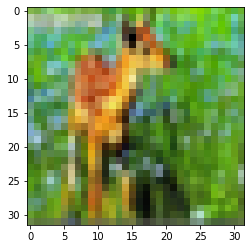

In [124]:
i = 1005
plt.imshow(X_train[i])
print(y_train[i])

/home/hasan/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


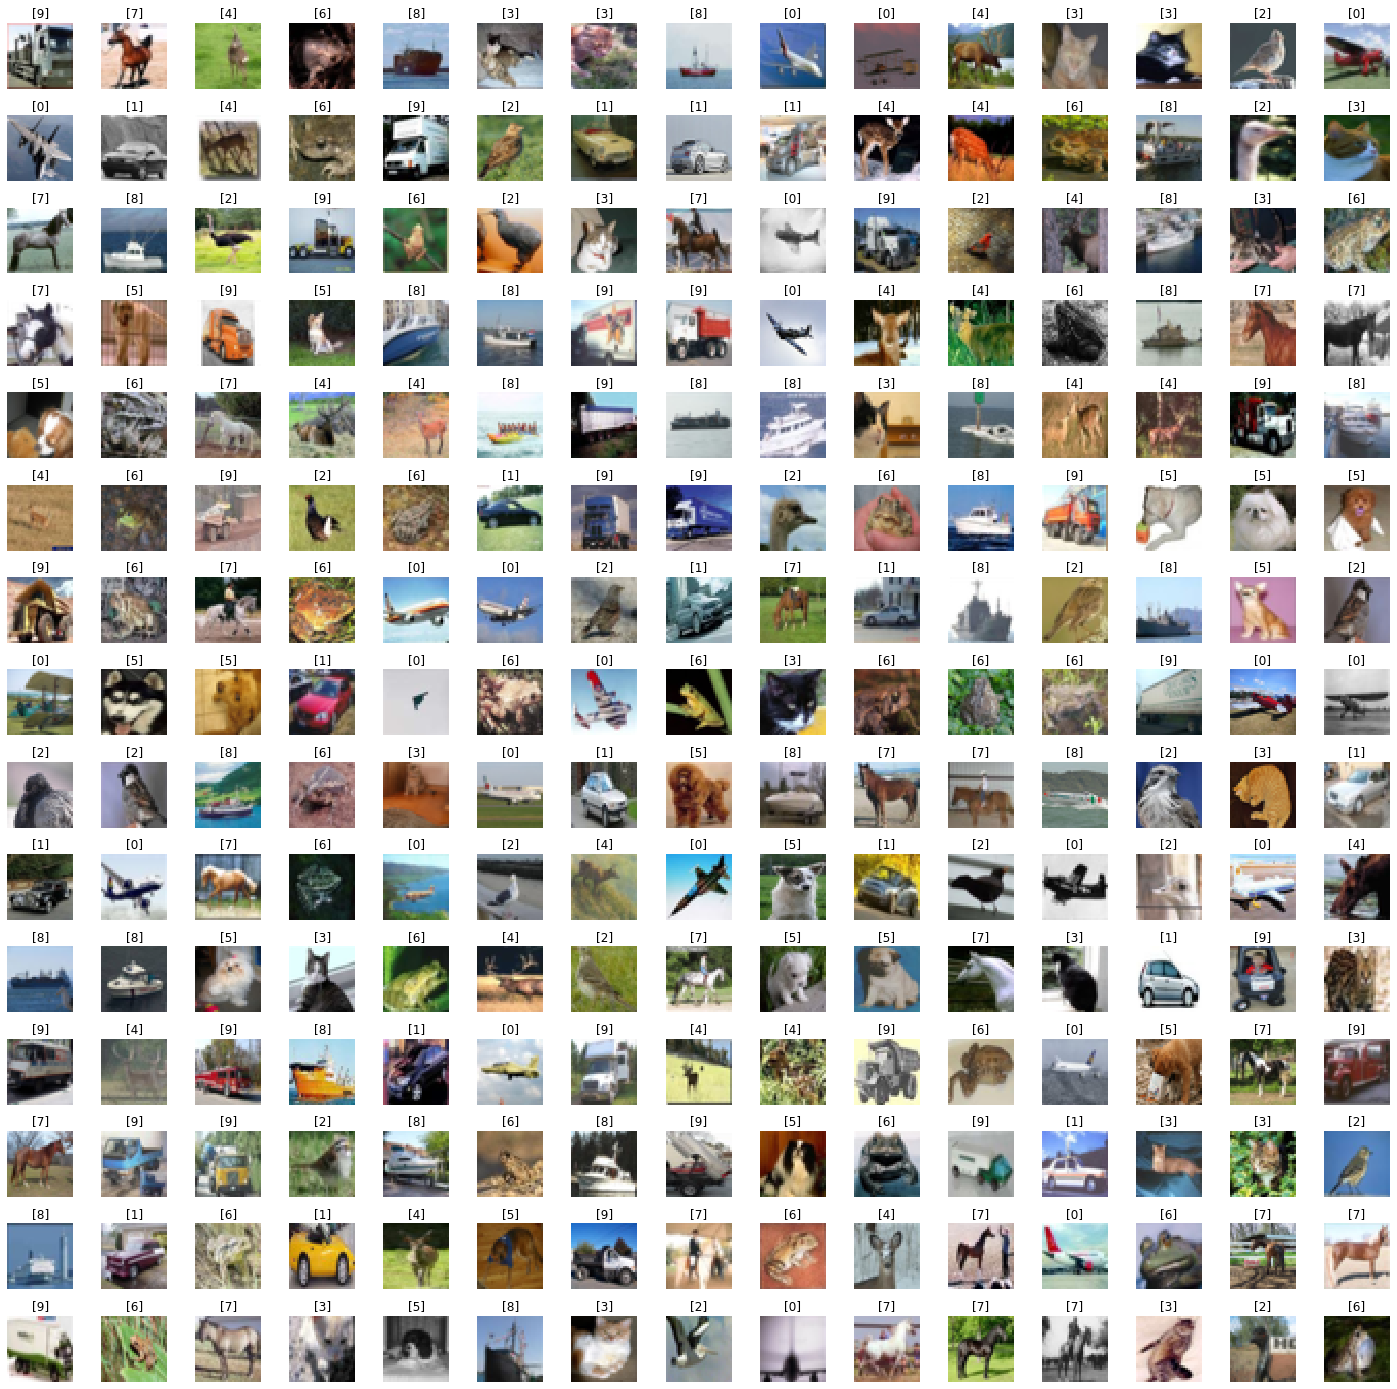

In [125]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [126]:
### data preparation ###

In [127]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [128]:
number_cat = 10

In [129]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [130]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [131]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [132]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [133]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [134]:
##normalization
X_train = X_train/255
X_test = X_test/255

In [135]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [136]:
Input_shape = X_train.shape[1:]

In [137]:
Input_shape

(32, 32, 3)

In [138]:
### build & train the model ###

In [139]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [140]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=Input_shape))
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

#two hidden layers
cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dense(units=1024, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))

In [141]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.rmsprop(lr=0.001), metrics=['accuracy'])

In [142]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=1, shuffle=True)

Epoch 1/1
50000/50000 [==============================] - 164s 3ms/step - loss: 1.6334 - accuracy: 0.4053


In [143]:
### evaluate the model ###

In [144]:
evaluation = cnn_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 18s 2ms/step


In [145]:
print('Test Accuracy: {}'.format(evaluation[1]))

Test Accuracy: 0.5396000146865845


In [146]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 4, 7])

In [147]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [148]:
y_test = y_test.argmax(1)

In [149]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

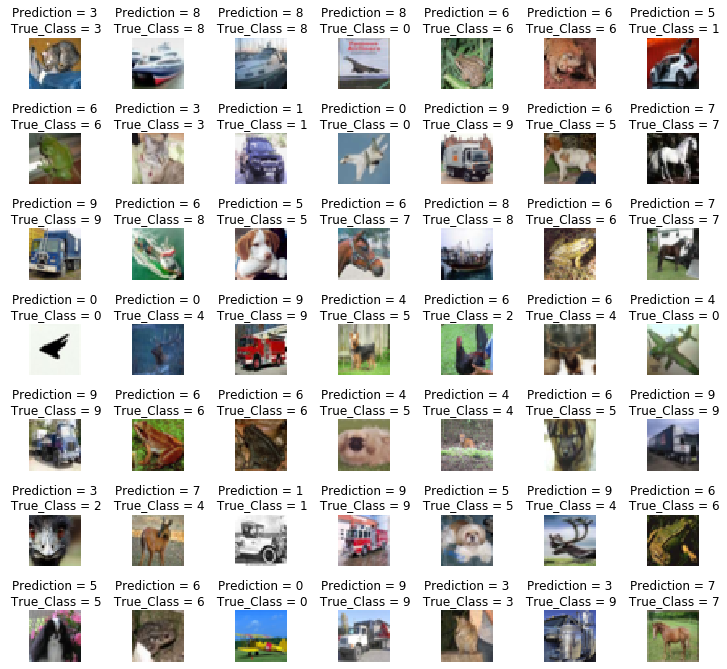

In [150]:
# visualizing predictions & true classes
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True_Class = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)

In [151]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm

array([[485,  21,  25,  42,  56,   7,  44,  16, 235,  69],
       [ 12, 653,   3,  12,  17,  10,  78,   6,  61, 148],
       [ 68,   4, 168, 137, 249,  89, 181,  64,  27,  13],
       [ 13,   7,  21, 353, 106, 125, 296,  46,  13,  20],
       [ 19,   6,  18,  78, 494,  15, 251,  98,  19,   2],
       [  9,   2,  21, 248, 103, 361, 146, 101,   4,   5],
       [  0,   3,  12,  33,  35,   4, 899,   7,   5,   2],
       [  6,   1,   6,  75, 127,  58,  88, 616,   4,  19],
       [ 63,  34,  13,  36,  21,  13,  42,  11, 721,  46],
       [ 23,  97,   6,  21,   4,  13, 118,  13,  59, 646]])

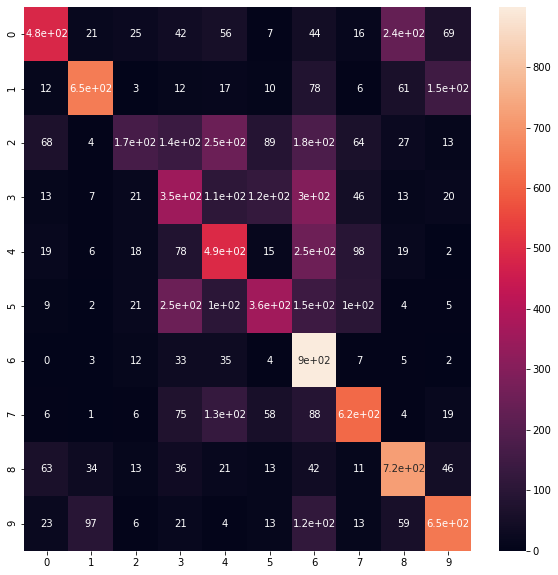

In [152]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

In [153]:
### saving the model ###

In [154]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

In [109]:
### data augmentation ###

In [111]:
import keras
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [112]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [113]:
X_train.shape

(50000, 32, 32, 3)

In [61]:
n = 8
X_train_sample = X_train[:n]

In [62]:
X_train_sample.shape

(8, 32, 32, 3)

In [63]:
from keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(rotation_range=90)
datagen_train.fit(X_train_sample)

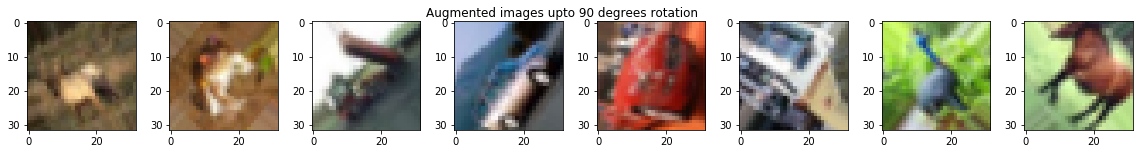

In [67]:
from keras.preprocessing.image import array_to_img

fig = plt.figure(figsize=(20,2))

for x_batch in datagen_train.flow(X_train_sample, batch_size=n):
    for i in range(0,n):
        ax = fig.add_subplot(1, n, i + 1)
        ax.imshow(array_to_img(x_batch[i]))
    fig.suptitle('Augmented images upto 90 degrees rotation')
    plt.show()
    break

In [155]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=90, 
                            width_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=True)

In [156]:
datagen.fit(X_train)

In [157]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs=5, )

Epoch 1/5
1563/1563 [==============================] - 223s 143ms/step - loss: 1.7827 - accuracy: 0.3573
Epoch 2/5
1563/1563 [==============================] - 235s 151ms/step - loss: 1.6625 - accuracy: 0.4024
Epoch 3/5
1563/1563 [==============================] - 197s 126ms/step - loss: 1.6164 - accuracy: 0.4221
Epoch 4/5
1563/1563 [==============================] - 208s 133ms/step - loss: 1.5863 - accuracy: 0.4348
Epoch 5/5
1563/1563 [==============================] - 214s 137ms/step - loss: 1.5590 - accuracy: 0.4438


In [159]:
y_test = keras.utils.to_categorical(y_test, number_cat)
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

10000/10000 [==============================] - 22s 2ms/step
Test accuracy 0.49399998784065247


In [160]:
### saving the model ###

In [161]:
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_augmentation.h5')
cnn_model.save(model_path)